Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

### Attribute Information
* Age : age of the patient [years]

* Sex : sex of the patient [M: Male, F: Female]
* ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP : resting blood pressure [mm Hg]
* Cholesterol : serum cholesterol [mm/dl]
* FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG : "An ECG (electrocardiogram) records the electrical activity of your heart at rest. It provides information about your heart rate and rhythm, and shows if there is enlargement of the heart due to high blood pressure (hypertension) or evidence of a previous heart attack (myocardial infarction)." 
.
resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
* Oldpeak : oldpeak = ST [Numeric value measured in depression]
* ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease : output class [1: heart disease, 0: Normal]

## Explor and Clean data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape
print("dataset contain",df.shape[0], 'rows and',df.shape[1], 'columns')

dataset contain 918 rows and 12 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


* dataset doesn't include any null values

In [5]:
# showing data describtion result :
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Univariate Visualization

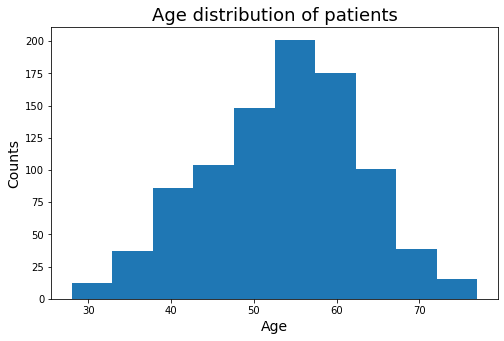

In [6]:
# Age :
plt.figure(figsize=[8,5]);
plt.hist(data = df, x = "Age");
plt.xlabel("Age", size = 14);
plt.ylabel("Counts", size = 14);
plt.title("Age distribution of patients", size = 18);

#### Age distribution seemed to be normally distributed

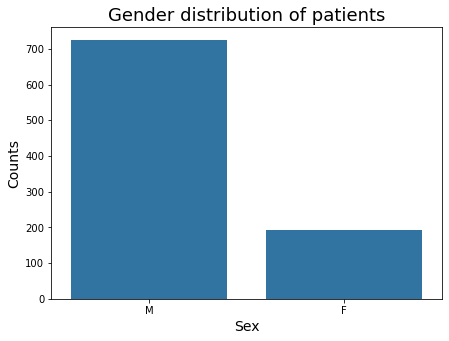

In [7]:
# Sex :
plt.figure(figsize=[7,5]);
color = sb.color_palette()[0]
sb.countplot(data = df, x = "Sex", color = color);
plt.xlabel("Sex", size = 14);
plt.ylabel("Counts", size = 14);
plt.title("Gender distribution of patients", size = 18);

* Males represented more than Females !

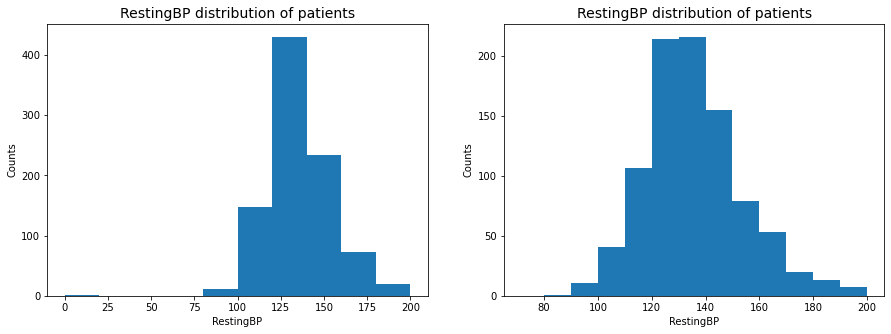

In [8]:
# RestingBP :

plt.figure(figsize=[15,5]);

plt.subplot(1,2,1);
plt.hist(data = df, x = "RestingBP");
plt.xlabel("RestingBP", size = 10);
plt.ylabel("Counts", size = 10);
plt.title("RestingBP distribution of patients", size = 14);

plt.subplot(1,2,2);
xbins = np.arange(70,210,10)
plt.hist(data = df, x = "RestingBP", bins = xbins);
plt.xlabel("RestingBP", size = 10);
plt.ylabel("Counts", size = 10);
plt.title("RestingBP distribution of patients", size = 14);
plt.xlim(65);

* we removed outliers from our visualization , "RestingBP" seemed to be normally distributed

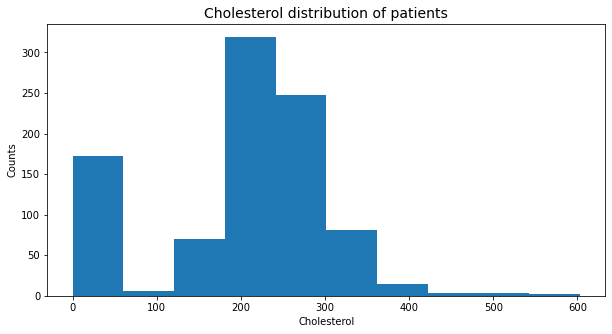

In [9]:
# Cholesterol :

plt.figure(figsize=[10,5]);
plt.hist(data = df, x = "Cholesterol");
plt.xlabel("Cholesterol", size = 10);
plt.ylabel("Counts", size = 10);
plt.title("Cholesterol distribution of patients", size = 14);

In [10]:
df['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

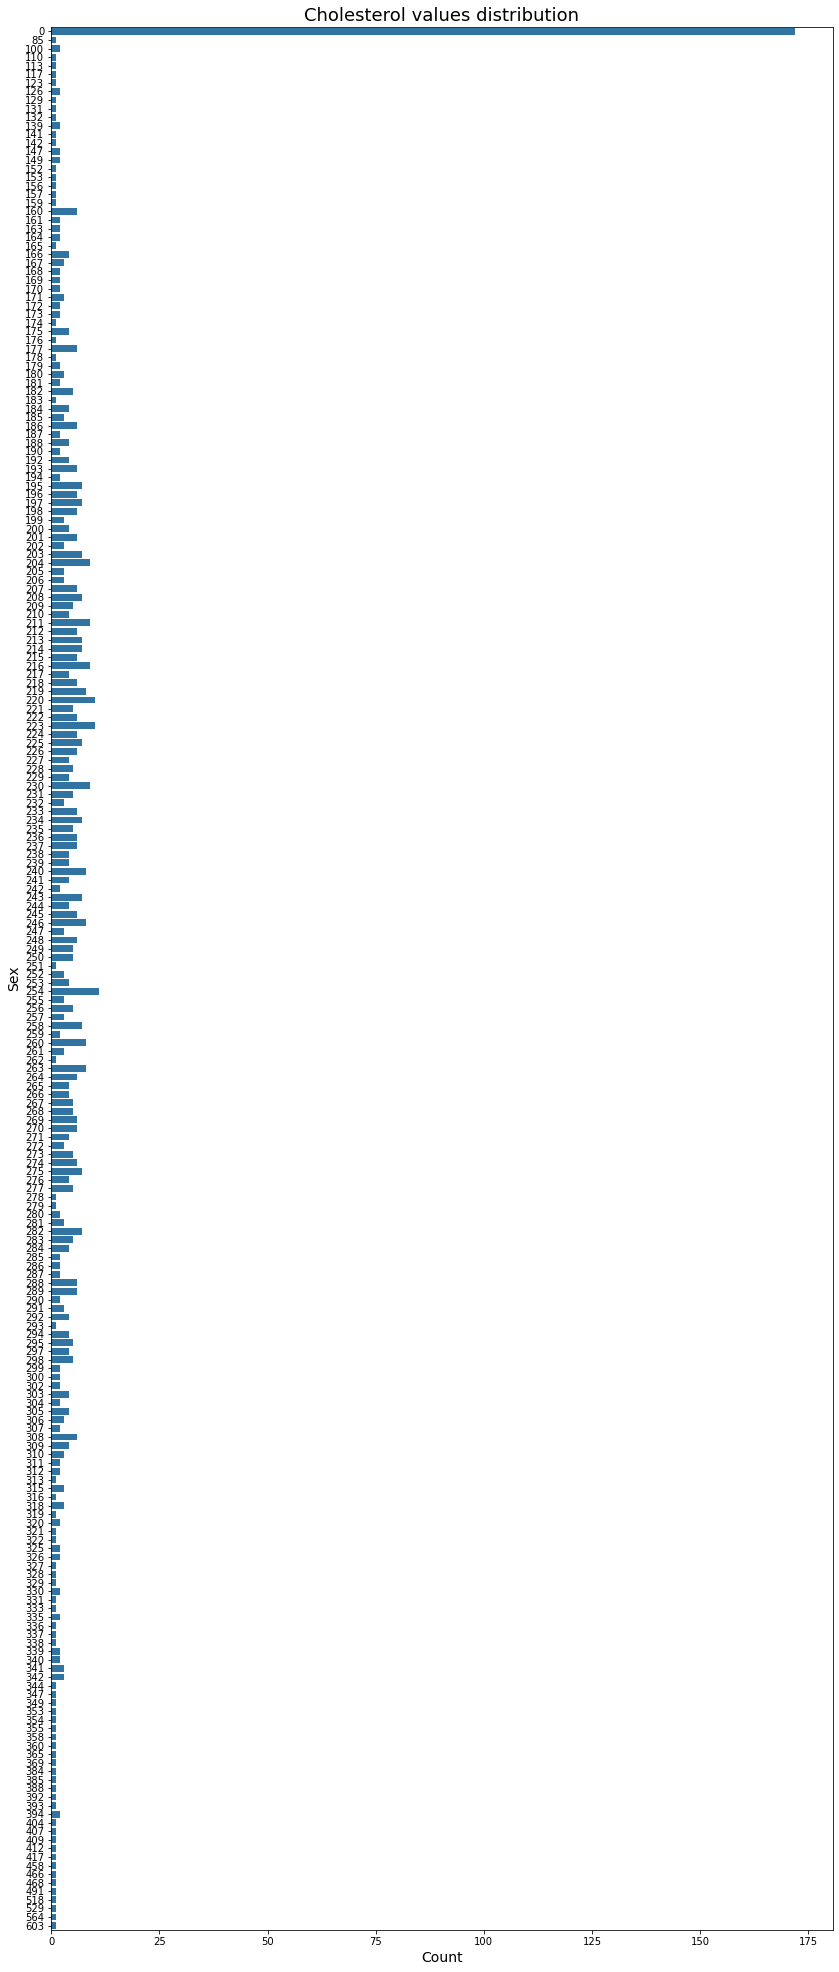

In [11]:
plt.figure(figsize=[14,35]);
color = sb.color_palette()[0]
sb.countplot(data = df, y = "Cholesterol", color = color);
plt.xlabel("Count", size = 14);
plt.ylabel("Sex", size = 14);
plt.title("Cholesterol values distribution", size = 18);

#### there is a long peak at 0 " 172 have 0 value ", we will drop them just in this visualisation only to look at another values

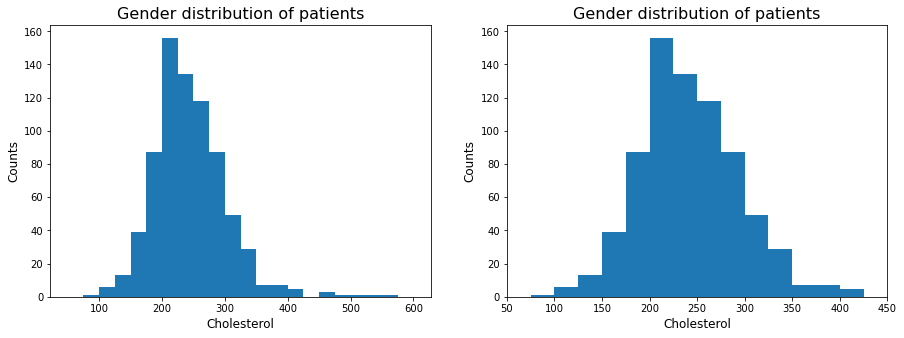

In [12]:
# creat a new data fram in which the values of "Cholesterol" column not equal to "0"
positive_cholest = df[df['Cholesterol'] != 0 ]

# visualiz the "Cholesterol" distribution in the new data fram
plt.figure(figsize=[15,5]);
plt.subplot(1,2,1);
bins = np.arange(50,620,25)
color = sb.color_palette()[0]
plt.hist(data = positive_cholest, x = "Cholesterol", color = color, bins = bins);
plt.xlabel("Cholesterol", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Gender distribution of patients", size = 16);

# remove some outliers from the visualization (with value > 450)
plt.subplot(1,2,2);
bins = np.arange(50,620,25)
color = sb.color_palette()[0]
plt.hist(data = positive_cholest, x = "Cholesterol", color = color, bins = bins);
plt.xlabel("Cholesterol", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Gender distribution of patients", size = 16);
# setting x-axis limitation
plt.xlim(50,450);

In [13]:
len(positive_cholest[positive_cholest['Cholesterol'] > 440])
# number of rows removed from our visualisation which treatment as outliers

8

###### conclusion :
* there are 172 person showed negative results in a cholesterol test ( value = 0 )
* the remainig rows ( distribution of cholesterol value ) seemed to be normally distributed after cutting some outliers from the visualization.


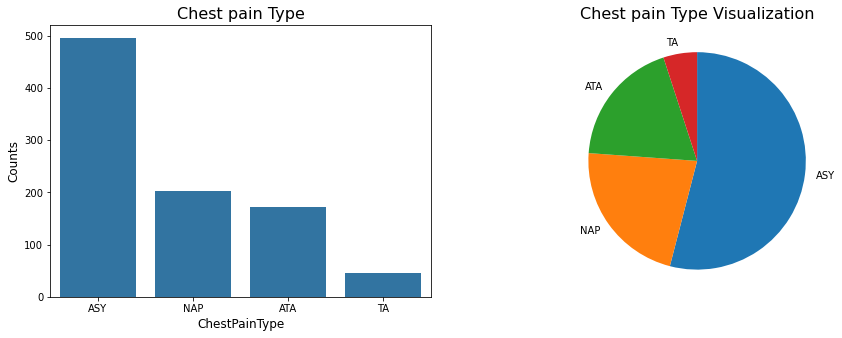

In [14]:
# ChestPainType :
order = df['ChestPainType'].value_counts().index
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.countplot(data = df, x = 'ChestPainType', order = order, color = color);
plt.xlabel("ChestPainType", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Chest pain Type", size = 16);

plt.subplot(1,2,2);
ChestPainType = df['ChestPainType'].value_counts()
plt.pie(ChestPainType ,labels = ChestPainType.index, startangle = 90,counterclock = False);
plt.title("Chest pain Type Visualization", size = 16);

* more than 50% of persons have "ASY" Chest Pain ..!

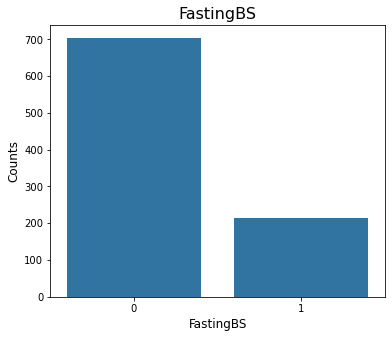

In [15]:
# FastingBS:
plt.figure(figsize = [6,5])
sb.countplot(data = df, x = 'FastingBS', color = color);
plt.xlabel("FastingBS", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("FastingBS", size = 16);

* The highest percentage of people represented in the database thier fasting blood sugar test less than 120 ( == 0 )

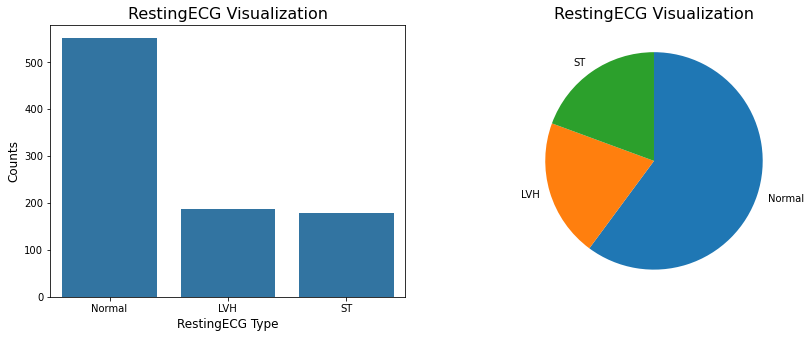

In [16]:
# RestingECG:
plt.figure(figsize = [14,5]);
plt.subplot(1,2,1);
order = df['RestingECG'].value_counts().index
sb.countplot(data = df, x = 'RestingECG', color = color, order = order);
plt.xlabel("RestingECG Type", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("RestingECG Visualization", size = 16);

plt.subplot(1,2,2);
RestingECG = df['RestingECG'].value_counts()
plt.pie(RestingECG ,labels = RestingECG.index, startangle = 90,counterclock = False);
plt.title("RestingECG Visualization", size = 16);


* more than 50% of people represented in the database thier RestingECG shows normal . 

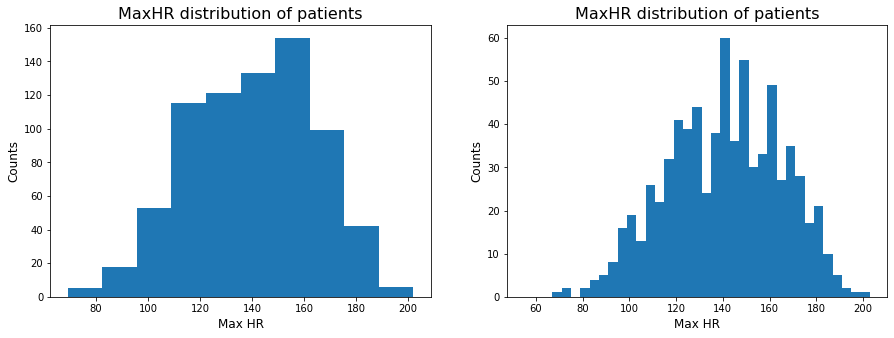

In [17]:
# MaxHR :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
plt.hist(data = positive_cholest, x = "MaxHR");
plt.xlabel("Max HR", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("MaxHR distribution of patients", size = 16);

plt.subplot(1,2,2);
bins = np.arange(55,202+4,4)
plt.hist(data = positive_cholest, x = "MaxHR", bins = bins);
plt.xlabel("Max HR", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("MaxHR distribution of patients", size = 16);

In [18]:
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

* mean (137) nearby equals to mediam (138)
* the distribution of "MaxHR" is slightly left-skewed .

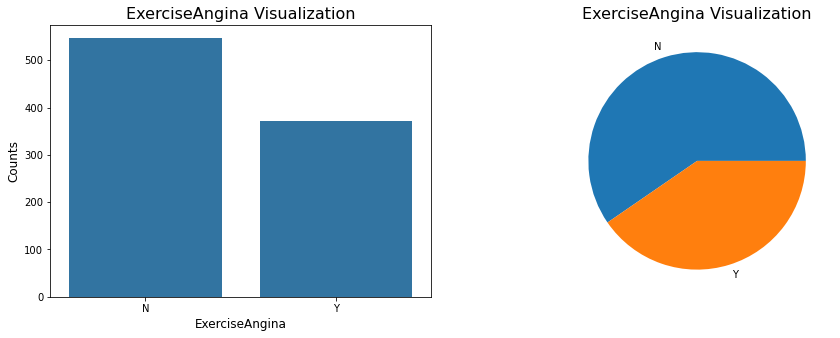

In [19]:
# ExerciseAngina :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.countplot( data = df, x = 'ExerciseAngina', color = color);
plt.xlabel("ExerciseAngina", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("ExerciseAngina Visualization", size = 16);

plt.subplot(1,2,2);
ExerciseAngina = df['ExerciseAngina'].value_counts()
plt.pie(ExerciseAngina, labels = ExerciseAngina.index);
plt.title("ExerciseAngina Visualization", size = 16);

* most of persons didn't have Angina due to excercise.
* N : No and Y : Yes !

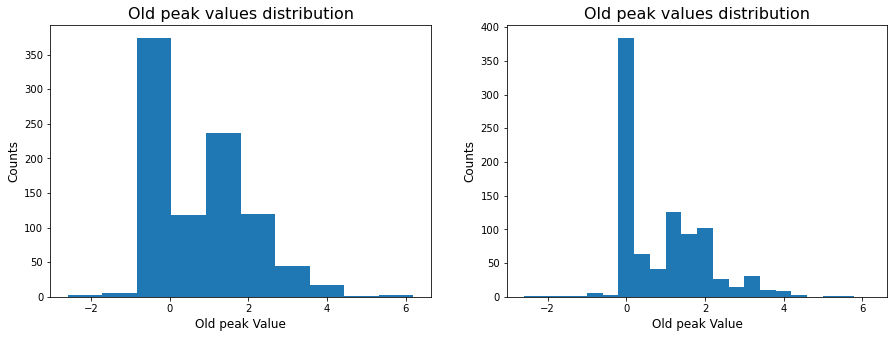

In [20]:
# Oldpeak :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
#bins = np.arange(55,202+4,4)
plt.hist(data = df, x = "Oldpeak");
plt.xlabel("Old peak Value", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Old peak values distribution", size = 16);

plt.subplot(1,2,2);
bins = np.arange(-2.6,6.2+0.4,0.4)
plt.hist(data = df, x = "Oldpeak", bins = bins);
plt.xlabel("Old peak Value", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Old peak values distribution", size = 16);

In [21]:
df['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 1.1      7
 0.7      7
 2.8      7
 1.9      7
 2.6      7
 1.3      7
 1.7      6
 2.2      5
 3.6      4
 0.9      4
 2.4      4
 3.4      3
 2.3      2
-1.0      2
-0.5      2
 3.5      2
 2.1      2
 4.2      2
-0.1      2
 3.2      2
-0.8      1
-0.9      1
 5.6      1
 3.8      1
 3.1      1
-0.7      1
-1.1      1
 5.0      1
-1.5      1
 3.7      1
 4.4      1
-2.0      1
 6.2      1
 2.9      1
-2.6      1
Name: Oldpeak, dtype: int64

* there are 368 person with "0" value for Old peak.

In [22]:
non_zero_peak = df[df['Oldpeak'] != 0]

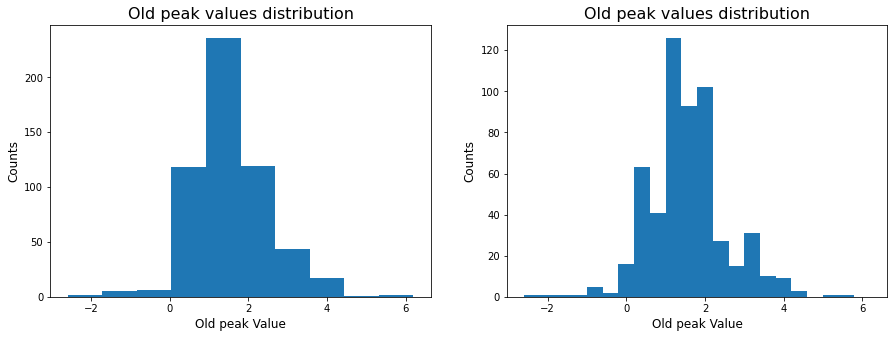

In [23]:
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
#bins = np.arange(55,202+4,4)
plt.hist(data = non_zero_peak, x = "Oldpeak");
plt.xlabel("Old peak Value", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Old peak values distribution", size = 16);

plt.subplot(1,2,2);
bins = np.arange(-2.6,6.2+0.4,0.4)
plt.hist(data = non_zero_peak, x = "Oldpeak", bins = bins);
plt.xlabel("Old peak Value", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Old peak values distribution", size = 16);

* if we created a new data fram without people who have "zero" value for Old peak , we will get a normal distribution of other values !!!

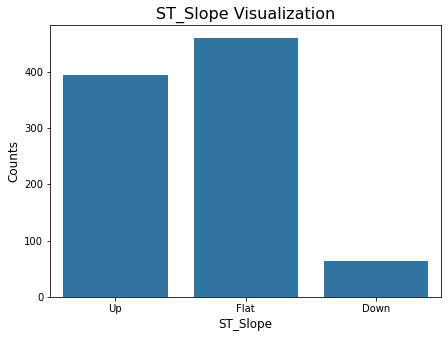

In [24]:
# ST_Slope :
plt.figure(figsize = [7,5]);
#df['ST_Slope'].value_counts()
sb.countplot( data = df, x = 'ST_Slope', color = color);
plt.xlabel("ST_Slope", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("ST_Slope Visualization", size = 16);

* The lowest percentage of people have "Down" ST_Slop!

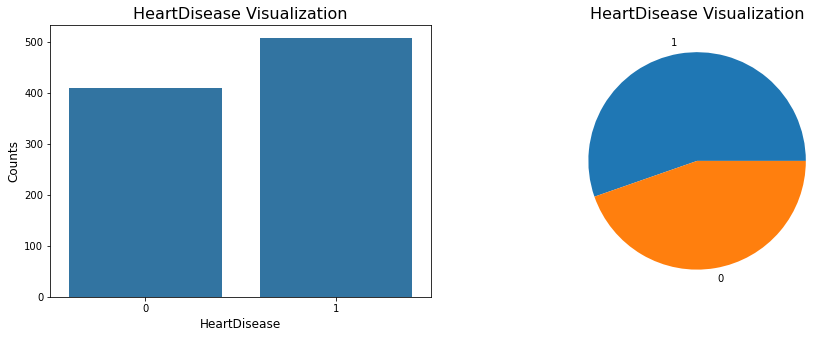

In [25]:
# HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.countplot( data = df, x = 'HeartDisease', color = color);
plt.xlabel("HeartDisease", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("HeartDisease Visualization", size = 16);

plt.subplot(1,2,2);
HeartDisease = df['HeartDisease'].value_counts()
plt.pie(HeartDisease, labels = HeartDisease.index);
plt.title("HeartDisease Visualization", size = 16);

* more than 50% of persons represented in dataset have Heart Disease !!

## Bivariate Visualization

* we will measure every variable VS HeartDisease Columns !

### First : Qualitative Variables 

* [Sex ,ChestPainType ,FastingBS ,RestingECG ,ExerciseAngina ,ST_Slope]

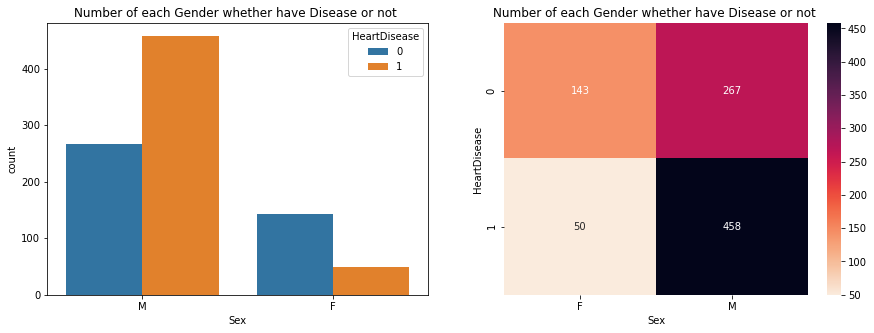

In [26]:
# Sex Vs, HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.countplot(data = df, x = 'Sex', hue = 'HeartDisease');
plt.title ("Number of each Gender whether have Disease or not ");

plt.subplot(1,2,2);
gender_dis = df.groupby(['Sex','HeartDisease']).size()
gender_dis = gender_dis.reset_index(name = 'count')
gender_dis = gender_dis.pivot(index = 'HeartDisease', columns = 'Sex', values = 'count')
sb.heatmap(gender_dis, annot = True, fmt = 'd', cmap = 'rocket_r');
plt.title ("Number of each Gender whether have Disease or not ");


In [27]:
# relative frequences of Mals and Femals who have Heart disease 

# for Males :
Freq_M_Heart = 458 / (458+267)

# for females :
Freq_F_Heart = 50 / (50+143)
print("percentage of males who have heart disease w.r.t the total number of men are : ",Freq_M_Heart)
print("percentage of femals who have heart disease w.r.t the total number of women are : ",Freq_F_Heart)

percentage of males who have heart disease w.r.t the total number of men are :  0.6317241379310344
percentage of femals who have heart disease w.r.t the total number of women are :  0.25906735751295334


####  from the left figure we can see that :
1. number of males who have heart Disease are "more" than who havn't
2. number of females who have heart Disease are "less" than who havn't

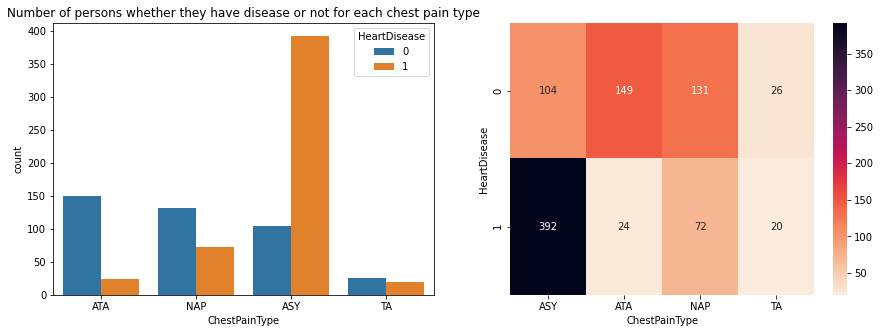

In [28]:
# ChestPainType vs HeartDisease :

plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.countplot(data = df, x = 'ChestPainType', hue = 'HeartDisease');
plt.title ("Number of persons whether they have disease or not for each chest pain type");

plt.subplot(1,2,2);
gender_dis = df.groupby(['ChestPainType','HeartDisease']).size()
gender_dis = gender_dis.reset_index(name = 'count')
gender_dis = gender_dis.pivot(index = 'HeartDisease', columns = 'ChestPainType', values = 'count')
sb.heatmap(gender_dis, annot = True, fmt = 'd',cmap = 'rocket_r');


* for each type of chest pain we can see that the number of people who have heart disease are less than who havn't , except for people who Asymptomatic, here we can see the opposite !!! (people who havn't any pain "ASY" much of them have heart disease)

In [29]:
ASY_1 = 392 / (392+104)
ASY_1
print('Percentage of people who do not suffer from any type of chest pain "ASP", but suffer from heart disease is :',ASY_1 )

Percentage of people who do not suffer from any type of chest pain "ASP", but suffer from heart disease is : 0.7903225806451613


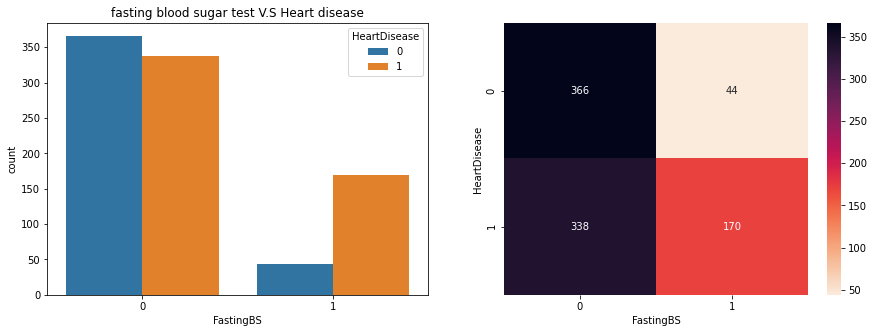

In [30]:
# FastingBS vs HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.countplot(data = df, x = 'FastingBS', hue = 'HeartDisease');
plt.title ("fasting blood sugar test V.S Heart disease");

plt.subplot(1,2,2);
gender_dis = df.groupby(['FastingBS','HeartDisease']).size()
gender_dis = gender_dis.reset_index(name = 'count')
gender_dis = gender_dis.pivot(index = 'HeartDisease', columns = 'FastingBS', values = 'count')
sb.heatmap(gender_dis, annot = True, fmt = 'd',cmap = 'rocket_r');

* People who take a fasting blood sugar test and have a result greater than 120 mg/dl are more likely to have heart disease


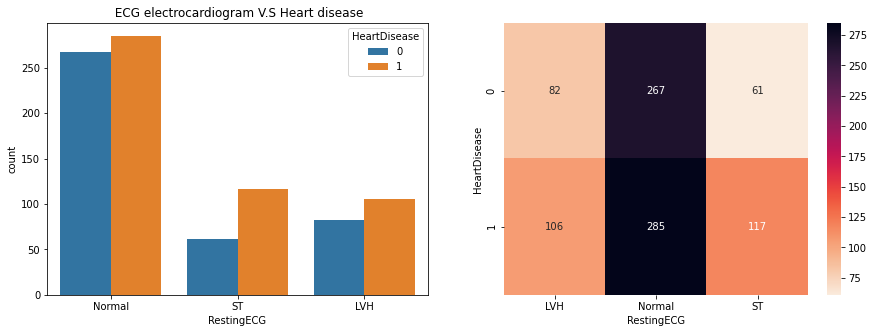

In [31]:
# RestingECG vs HeartDisease:
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.countplot(data = df, x = 'RestingECG', hue = 'HeartDisease');
plt.title (" ECG electrocardiogram V.S Heart disease");

plt.subplot(1,2,2);
gender_dis = df.groupby(['RestingECG','HeartDisease']).size()
gender_dis = gender_dis.reset_index(name = 'count')
gender_dis = gender_dis.pivot(index = 'HeartDisease', columns = 'RestingECG', values = 'count')
sb.heatmap(gender_dis, annot = True, fmt = 'd',cmap = 'rocket_r');

* for each ECG electrocardiogram record, number of people who have heart disease are more than who havn't

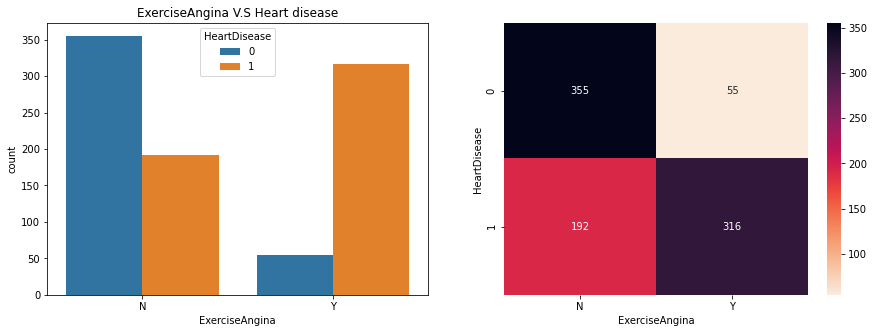

In [32]:
# ExerciseAngina vs HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.countplot(data = df, x = 'ExerciseAngina', hue = 'HeartDisease');
plt.title ("ExerciseAngina V.S Heart disease");

plt.subplot(1,2,2);
gender_dis = df.groupby(['ExerciseAngina','HeartDisease']).size()
gender_dis = gender_dis.reset_index(name = 'count')
gender_dis = gender_dis.pivot(index = 'HeartDisease', columns = 'ExerciseAngina', values = 'count')
sb.heatmap(gender_dis, annot = True, fmt = 'd',cmap = 'rocket_r');

In [33]:
Y_1 = 316 / (316+55) 
N_1 = 192 / (192+355)
print("percentage of people who have have heart disease from all who have exercise-induced angina is :",Y_1)
print("percentage of people who have have heart disease from all who havn't exercise-induced angina is :",N_1)

percentage of people who have have heart disease from all who have exercise-induced angina is : 0.8517520215633423
percentage of people who have have heart disease from all who havn't exercise-induced angina is : 0.3510054844606947


* People who have exercise-induced angina more likely to have heart disease 

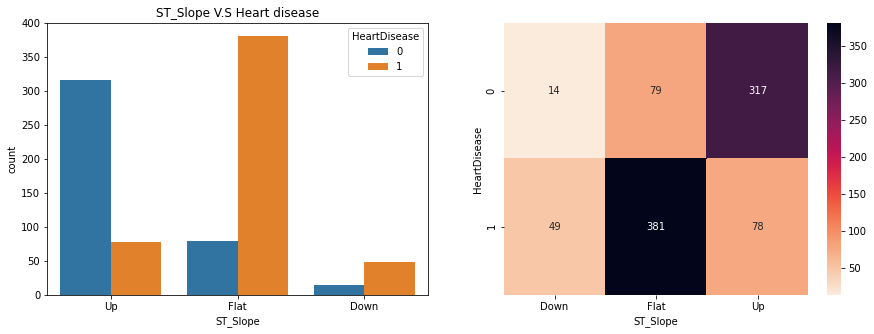

In [34]:
# ST_Slope vs HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.countplot(data = df, x = 'ST_Slope', hue = 'HeartDisease');
plt.title ("ST_Slope V.S Heart disease");

plt.subplot(1,2,2);
gender_dis = df.groupby(['ST_Slope','HeartDisease']).size()
gender_dis = gender_dis.reset_index(name = 'count')
gender_dis = gender_dis.pivot(index = 'HeartDisease', columns = 'ST_Slope', values = 'count')
sb.heatmap(gender_dis, annot = True, fmt = 'd',cmap = 'rocket_r');

In [35]:
# % people who have heart disease for each "slop" categories :

up_1 = 78/(78+317)
Flat_1 = 381/(381+79)
Down_1 = 49/(49+14)
print("percentage of people who have a heart disease among who have a UP slop is :",up_1)
print("percentage of people who have a heart disease among who have a FLAT slop is :",Flat_1)
print("percentage of people who have a heart disease among who have a DOWN slop is :",Down_1)

percentage of people who have a heart disease among who have a UP slop is : 0.19746835443037974
percentage of people who have a heart disease among who have a FLAT slop is : 0.8282608695652174
percentage of people who have a heart disease among who have a DOWN slop is : 0.7777777777777778


* for up slop : %people who have a heart disease is (less) than who haven't
* for Flat Slop : %people who have a heart disease is (much more) than who haven't
* for down slop :  %people who have a heart disease is (more) than who haven't

### Second : Quantitative Variables 

* [Age ,RestingBP ,Cholesterol ,MaxHR ,Oldpeak]

In [36]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [37]:
# from our univatiate visualization we noted that we have 172 person which thier Cholestrol result test is "zero" and  368 person which thier Oldpeak is "zero"

zero_cholest = df[df['Cholesterol']==0]
print("Number of people with cholestrol test result is zero are", zero_cholest.shape[0])
zero_peak = df[df['Oldpeak']==0]
print("Number of people with Oldpeak result is zero are", zero_peak.shape[0])

Number of people with cholestrol test result is zero are 172
Number of people with Oldpeak result is zero are 368


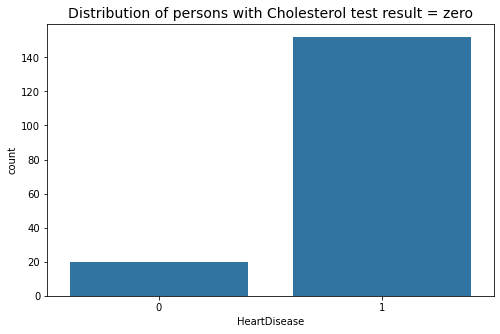

In [38]:
# we will visualize those two featuers vs HeartDisease "Target"
# Cholesterol

plt.figure(figsize = [8,5]);
color = sb.color_palette()[0]
sb.countplot(data = zero_cholest, x = 'HeartDisease', color = color);
plt.title('Distribution of persons with Cholesterol test result = zero', size = 14);

* most of persons who have zero result for Cholesterol test have Heart Disease ...!

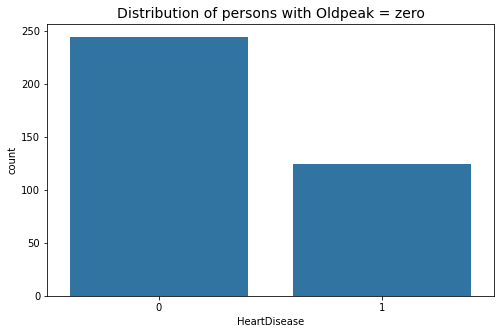

In [39]:
# Oldpeak 

plt.figure(figsize = [8,5]);
color = sb.color_palette()[0]
sb.countplot(data = zero_peak, x = 'HeartDisease', color = color);
plt.title('Distribution of persons with Oldpeak = zero', size = 14);

* most of persons with Oldpeak = zero havn't Heart Disease .

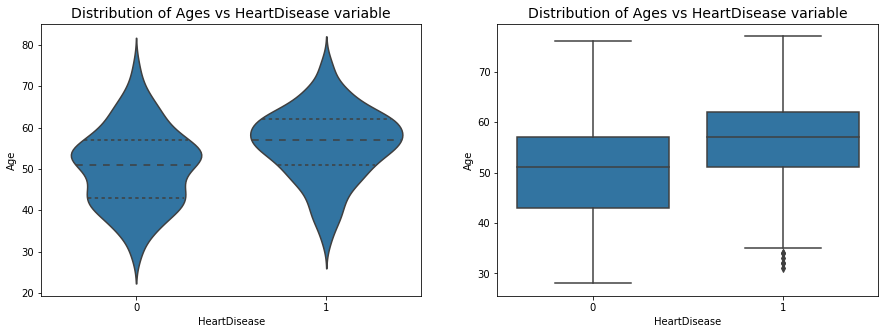

In [40]:
# Age VS. HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.violinplot(data = df, x = 'HeartDisease', y = 'Age', color = color, inner = 'quartile');
plt.title("Distribution of Ages vs HeartDisease variable", size = 14);

plt.subplot(1,2,2);
sb.boxplot(data = df, x = 'HeartDisease', y = 'Age', color = color);
plt.title("Distribution of Ages vs HeartDisease variable", size = 14);

* from the violin plot (for having heart disease) we can see that there is a peak for age distribution nearby at 56 and the distribution seemed normally distributed

* the average age of people who have heart disease is slightly higher than who healthy people (with existence some outliers for sick people)

In [41]:
# query the healthy and sick people :
sick = df.query("HeartDisease == 1")
healthy = df.query("HeartDisease == 0")

In [42]:
sick.Age.describe()

count    508.000000
mean      55.899606
std        8.727056
min       31.000000
25%       51.000000
50%       57.000000
75%       62.000000
max       77.000000
Name: Age, dtype: float64

In [43]:
# to show the outliers :
IQR = 62 - 51
outliers = 51 - (1.5*IQR)
sick[sick['Age'] < outliers]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
56,31,M,ASY,120,270,0,Normal,153,Y,1.5,Flat,1
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
115,33,F,ASY,100,246,0,Normal,150,Y,1.0,Flat,1
119,34,M,TA,140,156,0,Normal,180,N,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
313,34,M,ASY,115,0,1,Normal,154,N,0.2,Up,1


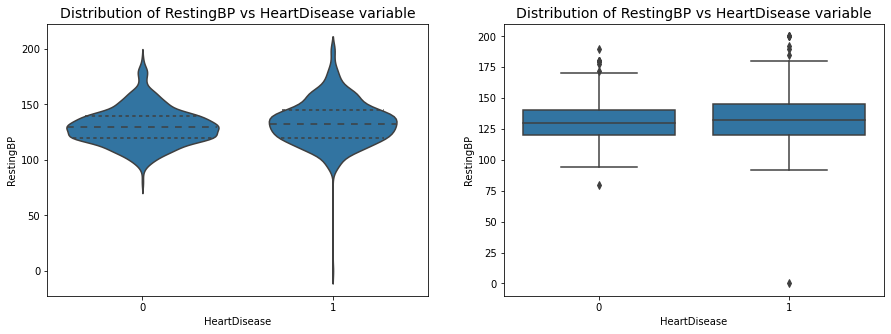

In [44]:
# RestingBP vs HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.violinplot(data = df, x = 'HeartDisease', y = 'RestingBP', color = color, inner = 'quartile');
plt.title("Distribution of RestingBP vs HeartDisease variable", size = 14);

plt.subplot(1,2,2);
sb.boxplot(data = df, x = 'HeartDisease', y = 'RestingBP', color = color);
plt.title("Distribution of RestingBP vs HeartDisease variable", size = 14);

* from the box plot figure we can conclude that the distribution of RestingBP for sick and healthy people seemed to be similar ( just one outlier for sick at Age = 0

In [45]:
sick.RestingBP.describe() 

count    508.000000
mean     134.185039
std       19.828685
min        0.000000
25%      120.000000
50%      132.000000
75%      145.000000
max      200.000000
Name: RestingBP, dtype: float64

In [46]:
# to show the lower outliers for sick :
IQR = 145 - 120
outliers = 120 - (1.5*IQR)
sick[sick['RestingBP'] < outliers]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [47]:
# to show the upper outliers for sick :
IQR = 145 - 120
outliers = 145 + (1.5*IQR)
sick[sick['RestingBP'] > outliers]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [48]:
healthy.RestingBP.describe()

count    410.000000
mean     130.180488
std       16.499585
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      190.000000
Name: RestingBP, dtype: float64

In [49]:
# to show the lower outliers for healthy :
IQR = 140 - 120
outliers = 120 - (1.5*IQR)
healthy[healthy['RestingBP'] < outliers]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0


In [50]:
# to show the upper outliers for healthy :
IQR = 140 - 120
outliers = 140 + (1.5*IQR)
healthy[healthy['RestingBP'] > outliers]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
423,60,M,NAP,180,0,0,ST,140,Y,1.5,Flat,0
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
780,64,F,ASY,180,325,0,Normal,154,Y,0.0,Up,0
880,52,M,NAP,172,199,1,Normal,162,N,0.5,Up,0


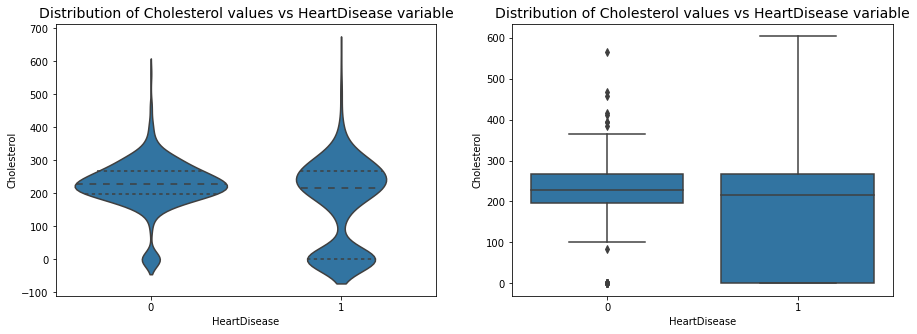

In [51]:
# Cholesterol vs HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.violinplot(data = df, x = 'HeartDisease', y = 'Cholesterol', color = color, inner = 'quartile');
plt.title("Distribution of Cholesterol values vs HeartDisease variable", size = 14);

plt.subplot(1,2,2);
sb.boxplot(data = df, x = 'HeartDisease', y = 'Cholesterol', color = color);
plt.title("Distribution of Cholesterol values vs HeartDisease variable", size = 14);

* there is two peaks for Cholesterol values distribution for sick people one at "0" and another at nearby "210"
* there is a strong peak at 210 for healthy people with the presence of some outliers
#### [ we can see the outliers like we have done above ]

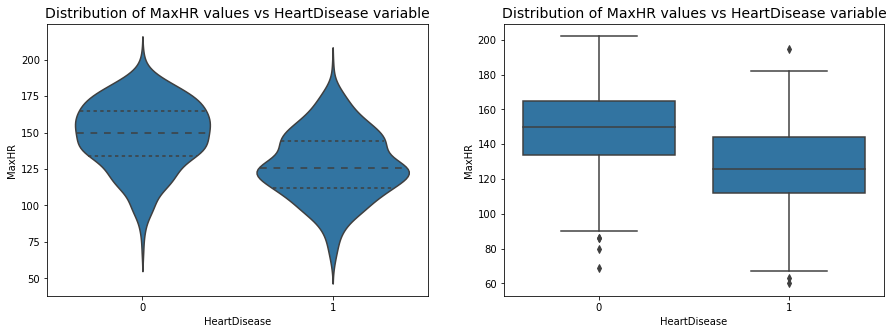

In [52]:
# MaxHR vs HeartDisease : 
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.violinplot(data = df, x = 'HeartDisease', y = 'MaxHR', color = color, inner = 'quartile');
plt.title("Distribution of MaxHR values vs HeartDisease variable", size = 14);

plt.subplot(1,2,2);
sb.boxplot(data = df, x = 'HeartDisease', y = 'MaxHR', color = color);
plt.title("Distribution of MaxHR values vs HeartDisease variable", size = 14);

* average value of MaxHR for sick people lower than that for healthy

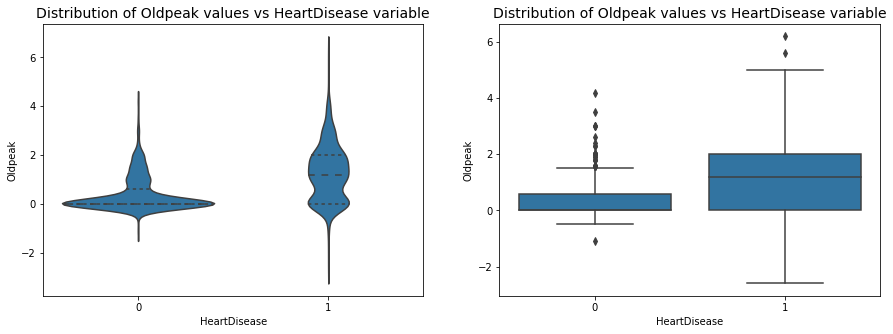

In [53]:
# Oldpeak vs HeartDisease :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sb.violinplot(data = df, x = 'HeartDisease', y = 'Oldpeak', color = color, inner = 'quartile');
plt.title("Distribution of Oldpeak values vs HeartDisease variable", size = 14);

plt.subplot(1,2,2);
sb.boxplot(data = df, x = 'HeartDisease', y = 'Oldpeak', color = color);
plt.title("Distribution of Oldpeak values vs HeartDisease variable", size = 14);

* we can see the broadness of distribution of Oldpeak for sick people, opposite of healthy
* most of Oldpeak Values for healthy confined between 0 and 0.3 with the presence of alot of outliers
* average value of Oldpeak for sick people higher than that for healthy

### we will check some Multivariate Vis. between some variables [ChestPainType, ExerciseAngina, ST_Slop, Oldpeak, and HeartDisease]

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


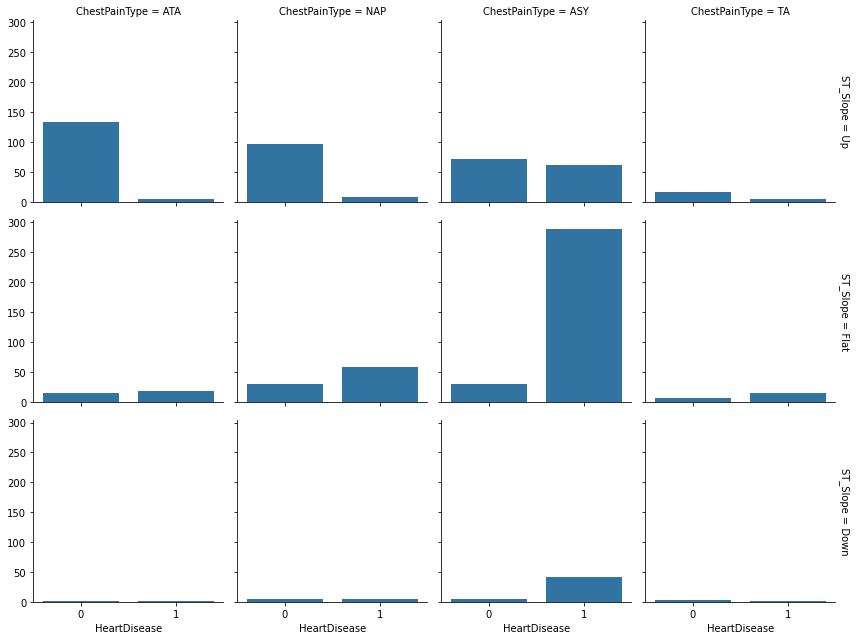

In [54]:
# ST_Slope vs. HeartDisease (for each Chest Pain Type) :
g = sb.FacetGrid(data = df, col = 'ChestPainType', row = 'ST_Slope', margin_titles = True);
g.map(sb.countplot,"HeartDisease");

* from this visualization we can conclude that :
1. for ST_Slope = Up : Whatever the type of chest pain, the proportion of patients in all cases is "lower" than that of healthy persons.
2. for ST_Slope = Flat : Whatever the type of chest pain, the proportion of patients in all cases is "higher" than that of healthy persons, especially if people do not suffer from any symptoms "ASY".
3. for ST_Slope = Down : It seems that the proportion of patients and healthy people in the case was the type of chest pain is "ATA" or "NAP" is equal, for "ASY" type patients are higher, and for "TA" patients are a little lower than healthy persons.


C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


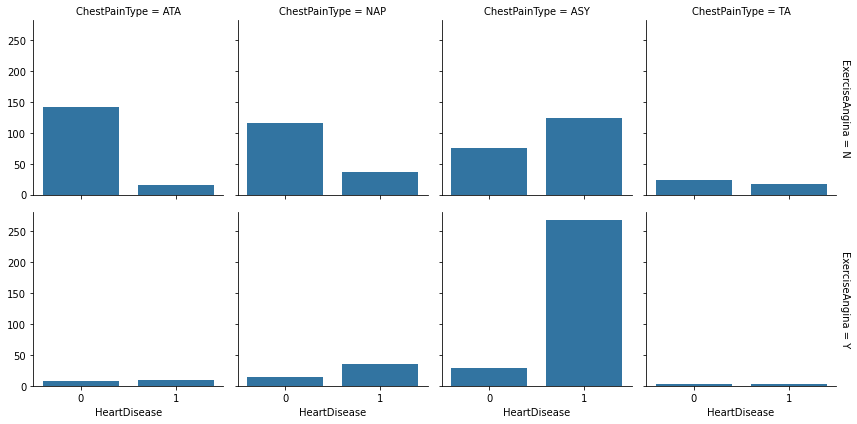

In [55]:
# ExerciseAngina vs. HeartDisease (for each Chest Pain Type) :
g = sb.FacetGrid(data = df, col = 'ChestPainType', row = 'ExerciseAngina', margin_titles = True);
g.map(sb.countplot,"HeartDisease");

#### For people with "NO" exercise-induced angina:
- The number of patients is less than the number of healthy people (whatever type of pain they suffer from).
- for people who didn't suffer from any type of chest pain, number of patients is higher than healthy !!

####  For people with "YES" exercise-induced angina:
- The number of patients is little higher than the number of healthy people (whatever type of pain they suffer from).
- for people who didn't suffer from any type of chest pain, number of patients is much more higher than healthy !!

## ASY ChestPainType :

In [71]:
# ASP_pain, Normal_Rest and Flat_Slop: 
asy_pain = df.query("ChestPainType == 'ASY' and RestingECG == 'Normal' and ST_Slope == 'Flat'")
asy_pain

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
16,38,M,ASY,110,196,0,Normal,166,N,0.0,Flat,1
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
895,57,M,ASY,110,335,0,Normal,143,Y,3.0,Flat,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1


In [76]:
asy_pain.HeartDisease.value_counts()

1    174
0     15
Name: HeartDisease, dtype: int64

In [78]:
189/918

0.20588235294117646

In [79]:
174/(174+15)

0.9206349206349206

* 55% of persons represented in dataset have Heart Disease !!
* Males are represented in a much larger proportion than females ( 79% are males ).
* there are 172 patients showed zero results in a cholesterol test ( value = 0 ) and  the remainig rows seemed to be normally distributed after removing  some outliers from the visualization.
* for patients whose cholesterol test = 0, % of patient who may have heart disease is 88%!
* more than 50% of patients didn't have any asymptomatic #(ASY)
* The highest percentage of patients represented in the database showed their fasting blood sugar test less than 120 ( == 0 )
* more than 50% of people represented in the database their RestingECG shows #Normal. 
* the distribution of "MaxHR" is slightly left-skewed .
* most of patients didn't have Angina due to excercise.
* there are 368 patients (40%) with "0" value for Old peak.
* most of patients with Oldpeak = zero havn't Heart Disease. (66.3%)
* The lowest percentage of people have "Down" ST_Slop!


#### bivaraite:
* number of males who have heart Disease are "more" than who havn't
* number of females who have heart Disease are "less" than who havn't
* for each type of chest pain we can see that the number of people who have heart disease are less than who havn't , except for people who Asymptomatic, here we can see the opposite !!! (people who havn't any pain "ASY" much of them have heart disease)
* People who showed positive fasting blood sugar test (result greater than 120 mg/dl) are more likely to have heart disease, although the number of people who have heart disease (whose test result = 0) is more than who haven't
* for each ECG electrocardiogram record type ,number of people who have heart disease are slightly more than who havn't
* People who have exercise-induced angina more likely to have heart disease 
* for up slop: % people who have heart disease is (much less) than who haven't
* for Flat Slop : % people who have heart disease is (much more) than who haven't
* for down slop : % people who have  heart disease is (much more) than who haven't
* the average age of people who have heart disease is slightly higher than who healthy people (with existence some outliers for sick people)
* average value of MaxHR for people who have heart disease is lower than that for healthy


#### mult_var:
1. for ST_Slope = Up : Whatever the type of chest pain, the proportion of patients in all cases is "lower" than that of healthy persons.
2. for ST_Slope = Flat : Whatever the type of chest pain, the proportion of patients in all cases is "higher" than that of healthy persons, especially if people do not suffer from any symptoms "ASY".
3. for ST_Slope = Down : It seems that the proportion of patients and healthy people in the case was the type of chest pain is "ATA" or "NAP" is equal, for "ASY" type patients are higher, and for "TA" patients are a little lower than healthy persons.

#### For people with "NO" exercise-induced angina:
- The number of patients is less than the number of healthy people (whatever type of pain they suffer from).
- for people who didn't suffer from any type of chest pain, number of patients is higher than healthy !!

####  For people with "YES" exercise-induced angina:
- The number of patients is little higher than the number of healthy people (whatever type of pain they suffer from).
- for people who didn't suffer from any type of chest pain, number of patients is much more higher than healthy !!


* for patients whose cholesterol test = 0, % of patient who may have heart disease is 88%!
* more than 50% of patients didn't have any asymptomatic #(ASY)
* The highest percentage of patients represented in the database showed their fasting blood sugar test less than 120 ( == 0 )
* more than 50% of people represented in the database their RestingECG shows #Normal. 
* there are 368 patients (40%) with "0" value for Old peak, and most of them havn't Heart Disease. (66.3%)
* for each type of chest pain we can see that the number of people who have heart disease are less than who havn't , except for people who Asymptomatic, here we can see the opposite !!! (people who havn't any pain "ASY" much of them have heart disease)
* People who showed positive fasting blood sugar test (result greater than 120 mg/dl) are more likely to have heart disease, although the number of people who have heart disease (whose test result = 0) is more than who haven't
* People who have exercise-induced angina more likely to have heart disease 
* the average age of people who have heart disease is slightly higher than who healthy people (with existence some outliers for sick people)
* average value of MaxHR for people who have heart disease is lower than that for healthy